In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

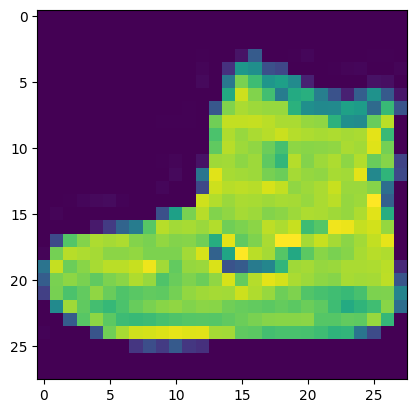

In [ ]:
plt.imshow(x_train[0])

In [ ]:
print(y_train[0])

9


In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
x_train = x_train.astype(float) /255.0
x_test = x_test.astype(float) /255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer ,Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=10,kernel_size=3,strides=(1,1),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 10)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 10)          910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 10)         

In [ ]:
import tensorflow
model.compile(optimizer='adam',loss=tensorflow.keras.losses.categorical_crossentropy,metrics=['acc'])

In [ ]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
history = model.fit(x_train,y_train,epochs=30,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/30
118/118 [==============================] - 30s 233ms/step - loss: 0.4210 - acc: 0.8447 - val_loss: 0.4614 - val_acc: 0.8317
Epoch 2/30
118/118 [==============================] - 20s 165ms/step - loss: 0.4199 - acc: 0.8453 - val_loss: 0.4530 - val_acc: 0.8345
Epoch 3/30
118/118 [==============================] - 19s 159ms/step - loss: 0.4168 - acc: 0.8454 - val_loss: 0.4556 - val_acc: 0.8335
Epoch 4/30
118/118 [==============================] - 20s 169ms/step - loss: 0.4139 - acc: 0.8475 - val_loss: 0.4615 - val_acc: 0.8322
Epoch 5/30
118/118 [==============================] - 19s 158ms/step - loss: 0.4126 - acc: 0.8477 - val_loss: 0.4619 - val_acc: 0.8325
Epoch 6/30
118/118 [==============================] - 20s 172ms/step - loss: 0.4091 - acc: 0.8489 - val_loss: 0.4479 - val_acc: 0.8349
Epoch 7/30
118/118 [==============================] - 19s 164ms/step - loss: 0.4079 - acc: 0.8491 - val_loss: 0.4443 - val_acc: 0.8370
Epoch 8/30
118/118 [==============================] - 2

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

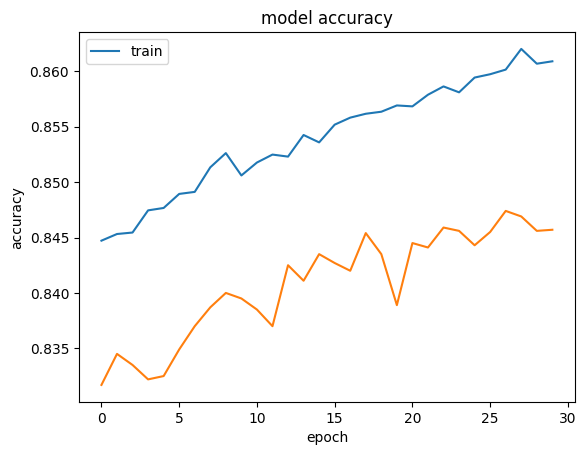

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()